# **Experiment Notebook**



## Hypothesis



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
!pip install my_krml_25552249==2025.0.7.2


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [4]:
# <Student to fill this section>
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Custom Modules
from my_krml_25552249.features.selection import (
    run_rfe,
    get_feature_importance
)

---
## A. Project Description


In [6]:
# <Student to fill this section>
student_name = "Shawya Saito"
student_id = "25552249"
group_id = "13"

In [7]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [8]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [9]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [10]:
# <Student to fill this section>
business_use_case_description = """
Explain clearly what is the goal of this project for the business.
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [12]:
# <Student to fill this section>
business_objectives = """
What will be the impact of accurate or incorrect results?
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [14]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
How will the results be used?
Who will be the users of your predictions? Who will be impacted by your predictions?
"""

In [15]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [16]:
# Load all datasets
raw_df_2020 = pd.read_csv("../data/Solana_01_01_2020-01_01_2021_historical_data_coinmarketcap.csv", delimiter=";")
raw_df_2021 = pd.read_csv("../data/Solana_01_01_2021-01_01_2022_historical_data_coinmarketcap.csv", delimiter=";")
raw_df_2022 = pd.read_csv("../data/Solana_01_01_2022-01_01_2023_historical_data_coinmarketcap.csv", delimiter=";")
raw_df_2023 = pd.read_csv("../data/Solana_01_01_2023-01_01_2024_historical_data_coinmarketcap.csv", delimiter=";")
raw_df_2024 = pd.read_csv("../data/Solana_01_01_2024-01_01_2025_historical_data_coinmarketcap.csv", delimiter=";")

Combine all columns

In [17]:
solana_df = pd.concat([raw_df_2020, raw_df_2021, raw_df_2022, raw_df_2023, raw_df_2024], ignore_index=True)


In [18]:
# First convert time to datetime dtype

def convert_datetime_columns(df, datetime_cols, utc=True):
    """
    Converts specified columns in a DataFrame to datetime.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame whose columns you want to convert.
    datetime_cols : list
        List of column names to convert to datetime.
    utc : bool, default True
        Whether to convert to UTC timezone.

    Returns
    -------
    pd.DataFrame
        The same DataFrame with converted datetime columns.
    """
    for col in datetime_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], utc=utc, errors="coerce")
        else:
            print(f"Warning: '{col}' not found in DataFrame columns.")
    return df


datetime_cols = ["timeOpen", "timeClose", "timeHigh", "timeLow", "timestamp"]

solana_df = convert_datetime_columns(solana_df, datetime_cols)

In [19]:
# Then sort by datetime
solana_df = solana_df.sort_values(by="timeOpen", ascending=True).reset_index(drop=True)

Clean some of the columns

In [20]:
def convert_numeric_columns(df, numeric_cols):
    """
    Converts specified columns in a DataFrame to numeric (float) with coercion for invalid values.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame whose columns you want to convert.
    numeric_cols : list
        List of column names to convert to numeric.

    Returns
    -------
    pd.DataFrame
        The same DataFrame with converted numeric columns.
    """
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
        else:
            print(f"Warning: '{col}' not found in DataFrame columns.")
    return df

numeric_cols = ["open", "high", "low", "close", "volume", "marketCap"]
solana_df = convert_numeric_columns(solana_df, numeric_cols)

In [21]:
solana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeOpen   1726 non-null   datetime64[ns, UTC]
 1   timeClose  1726 non-null   datetime64[ns, UTC]
 2   timeHigh   1726 non-null   datetime64[ns, UTC]
 3   timeLow    1726 non-null   datetime64[ns, UTC]
 4   name       1726 non-null   int64              
 5   open       1726 non-null   float64            
 6   high       1726 non-null   float64            
 7   low        1726 non-null   float64            
 8   close      1726 non-null   float64            
 9   volume     1726 non-null   float64            
 10  marketCap  1726 non-null   float64            
 11  timestamp  1726 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](5), float64(6), int64(1)
memory usage: 161.9 KB


Look at name column

In [22]:
solana_df = solana_df.drop("name", axis=1)

In [23]:
solana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeOpen   1726 non-null   datetime64[ns, UTC]
 1   timeClose  1726 non-null   datetime64[ns, UTC]
 2   timeHigh   1726 non-null   datetime64[ns, UTC]
 3   timeLow    1726 non-null   datetime64[ns, UTC]
 4   open       1726 non-null   float64            
 5   high       1726 non-null   float64            
 6   low        1726 non-null   float64            
 7   close      1726 non-null   float64            
 8   volume     1726 non-null   float64            
 9   marketCap  1726 non-null   float64            
 10  timestamp  1726 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](5), float64(6)
memory usage: 148.5 KB


### C.2 Define Target variable

In [24]:
# <Student to fill this section>


In [25]:
# Shift the 'high' column by -2 to create the target 2 days ahead
solana_df['high_2d_ahead'] = solana_df['high'].shift(-2)

# Check the first few rows
print(solana_df[['timeOpen', 'high', 'high_2d_ahead']].head(5))
# Check the last few rows
print(solana_df[['timeOpen', 'high', 'high_2d_ahead']].tail(5))

                   timeOpen      high  high_2d_ahead
0 2020-04-11 00:00:00+00:00  1.049073       0.891603
1 2020-04-12 00:00:00+00:00  0.956670       0.796472
2 2020-04-13 00:00:00+00:00  0.891603       0.704964
3 2020-04-14 00:00:00+00:00  0.796472       0.774192
4 2020-04-15 00:00:00+00:00  0.704964       0.719614
                      timeOpen        high  high_2d_ahead
1721 2024-12-27 00:00:00+00:00  193.753356     197.181083
1722 2024-12-28 00:00:00+00:00  195.435436     196.122917
1723 2024-12-29 00:00:00+00:00  197.181083     198.678389
1724 2024-12-30 00:00:00+00:00  196.122917            NaN
1725 2024-12-31 00:00:00+00:00  198.678389            NaN


In [26]:
# Drop the NaN columns
solana_df = solana_df.dropna(subset=['high_2d_ahead'])

In [27]:
# <Student to fill this section>
target_definition_explanations = """
Explain the rationale on the definition of the target variable according to your business use case.
"""

In [28]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [29]:
# <Student to fill this section>

target_name = 'high_2d_ahead'

### C.4 Explore Target variable

In [30]:
def add_lag_and_rolling_features(df, lags=[1, 2], rolling_windows=[3, 7], cols=['high', 'close', 'volume', 'open']):
    """
    Adds lag features and rolling averages for specified columns,
    and drops rows with NaN values created by these features.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame sorted by time (chronologically).
    lags : list
        List of lag days to create (default [1, 2]).
    rolling_windows : list
        List of rolling window sizes for moving averages (default [3, 7]).
    cols : list
        List of columns to create lag/rolling features for (default ['high', 'close', 'volume', 'open']).

    Returns
    -------
    pd.DataFrame
        DataFrame with new lag and rolling average features, NaN rows dropped.
    """
    
    df = df.copy()  # avoid modifying original DataFrame
    
    # Lag features
    for col in cols:
        for lag in lags:
            df[f'{col}_lag{lag}'] = df[col].shift(lag)
    
    # Rolling averages
    for col in cols:
        for window in rolling_windows:
            df[f'{col}_ma{window}'] = df[col].rolling(window).mean()
    
    # Drop all rows with NaN values created by lag/rolling
    df = df.dropna().reset_index(drop=True)
    
    return df

### C.5 Explore Feature of Interest `volume`

---
## D. Feature Selection


### D.1 Approach "Correlation"


## D.z Final Selection of Features

In [31]:
# <Student to fill this section>
feature_selection_explanations = """
provide a quick explanation on the features selected
"""

In [32]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>

In [33]:
# Apply all transformation to the data for the selected features

In [34]:
# Load data again
solana_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1724 entries, 0 to 1723
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   timeOpen       1724 non-null   datetime64[ns, UTC]
 1   timeClose      1724 non-null   datetime64[ns, UTC]
 2   timeHigh       1724 non-null   datetime64[ns, UTC]
 3   timeLow        1724 non-null   datetime64[ns, UTC]
 4   open           1724 non-null   float64            
 5   high           1724 non-null   float64            
 6   low            1724 non-null   float64            
 7   close          1724 non-null   float64            
 8   volume         1724 non-null   float64            
 9   marketCap      1724 non-null   float64            
 10  timestamp      1724 non-null   datetime64[ns, UTC]
 11  high_2d_ahead  1724 non-null   float64            
dtypes: datetime64[ns, UTC](5), float64(7)
memory usage: 175.1 KB


Feature Engineering

In [273]:
# Make a copy of solana_df for modeling
model_df = solana_df.copy()

# Ensure chronological order
model_df = model_df.sort_values('timeOpen').reset_index(drop=True)

# Difference in high 2 days ahead
model_df['high_diff'] = model_df['high'].diff()
model_df['close_diff'] = model_df['close'].diff()
model_df['open_diff'] = model_df['open'].diff()

# Time-based features
model_df['day_of_week'] = model_df['timeOpen'].dt.dayofweek
model_df['month'] = model_df['timeOpen'].dt.month
model_df['year'] = model_df['timeOpen'].dt.year

# Cyclical encoding
# Day of week
model_df['day_of_week_sin'] = np.sin(2 * np.pi * model_df['day_of_week']/7)
model_df['day_of_week_cos'] = np.cos(2 * np.pi * model_df['day_of_week']/7)
# Month
model_df['month_sin'] = np.sin(2 * np.pi * model_df['month']/12)
model_df['month_cos'] = np.cos(2 * np.pi * model_df['month']/12)

# Lag and rolling features
model_df = add_lag_and_rolling_features(
    model_df,
    lags=[1,2],
    rolling_windows=[3,7],
    cols=['high', 'close', 'volume', 'open']
)

In [147]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   timeOpen         1718 non-null   datetime64[ns, UTC]
 1   timeClose        1718 non-null   datetime64[ns, UTC]
 2   timeHigh         1718 non-null   datetime64[ns, UTC]
 3   timeLow          1718 non-null   datetime64[ns, UTC]
 4   open             1718 non-null   float64            
 5   high             1718 non-null   float64            
 6   low              1718 non-null   float64            
 7   close            1718 non-null   float64            
 8   volume           1718 non-null   float64            
 9   marketCap        1718 non-null   float64            
 10  timestamp        1718 non-null   datetime64[ns, UTC]
 11  high_2d_ahead    1718 non-null   float64            
 12  high_diff        1718 non-null   float64            
 13  close_diff       1

In [37]:
model_df.head()

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,...,open_lag1,open_lag2,high_ma3,high_ma7,close_ma3,close_ma7,volume_ma3,volume_ma7,open_ma3,open_ma7
0,2020-04-17 00:00:00+00:00,2020-04-17 23:59:59.999000+00:00,2020-04-17 02:10:18+00:00,2020-04-17 23:59:17+00:00,0.689312,0.719614,0.660728,0.660728,9870810.00,0.0,...,0.630879,0.669289,0.732923,0.841798,0.666065,0.728182,1.476404e+07,2.312148e+07,0.663160,0.770653
1,2020-04-18 00:00:00+00:00,2020-04-18 23:59:59.999000+00:00,2020-04-18 14:49:09+00:00,2020-04-18 00:17:13+00:00,0.660728,0.717618,0.659427,0.681096,9782111.90,0.0,...,0.689312,0.630879,0.737141,0.794448,0.677547,0.714508,1.366632e+07,1.825286e+07,0.660306,0.729178
2,2020-04-19 00:00:00+00:00,2020-04-19 23:59:59.999000+00:00,2020-04-19 00:13:15+00:00,2020-04-19 16:40:16+00:00,0.681516,0.684641,0.598487,0.606969,9289670.38,0.0,...,0.660728,0.689312,0.707291,0.755586,0.649598,0.675145,9.647531e+06,1.404611e+07,0.677185,0.714331
3,2020-04-20 00:00:00+00:00,2020-04-20 23:59:59.999000+00:00,2020-04-20 09:37:11+00:00,2020-04-20 20:07:11+00:00,0.612948,0.639254,0.520578,0.538812,8342616.42,0.0,...,0.681516,0.660728,0.680504,0.719536,0.608959,0.641000,9.138133e+06,1.263630e+07,0.651730,0.674643
4,2020-04-21 00:00:00+00:00,2020-04-21 23:59:59.999000+00:00,2020-04-21 23:30:11+00:00,2020-04-21 11:43:15+00:00,0.541387,0.604586,0.508549,0.587659,9711507.45,0.0,...,0.612948,0.681516,0.642827,0.692124,0.577813,0.630390,9.114598e+06,1.163115e+07,0.611950,0.640866


---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"


In [38]:
# <Student to fill this section>

In [39]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [40]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [371]:
# features_list = [
#     'close', 'high',   
#     'close_lag1', 'close_lag2', 
#     'high_lag1', 'high_lag2',
#     'high_diff', 'close_diff', 
#     'close_ma3', 'volume',
#     'volume_lag1', 'volume_lag2',
#     'volume_ma3',
#     'year'
# ] 

features_list = [
    'close', 'high',   
    'close_lag1', 'close_lag2', 
    'high_lag1', 'high_lag2',
    'high_diff', 'close_diff', 
    'close_ma3', 'volume',
    'volume_lag1', 'volume_lag2',
    'volume_ma3'
]

In [372]:
import numpy as np

# features_list = [
#     'close', 'high',      
#     'close_lag1', 'close_lag2', 
#     'high_lag1', 'high_lag2',
#     'high_diff', 
#     'close_ma3', 'close_ma7',
#     'high_ma3',
#     'volume_lag1', 'volume_lag2',
#     'volume_ma3', 'volume_ma7',
#     'month_sin', 'month_cos',
#     'year'
# ]

# features_list = [
#     'close', 'high', 'volume_ma7', 'close_ma3', 'high_diff', 'close_lag1',
#     'year', 'close_ma7', 'high_ma3', 'close_diff', 'volume', 
# ]

target = ['high_2d_ahead']

# Log-transform the target
# model_df['target_log'] = np.log1p(model_df['high_2d_ahead'])

# Filter data for 2021 and onwards
model_df_filtered = model_df[model_df['year'] >= 2021].reset_index(drop=True)

# 90/10 split index
train_size = 0.9
split_index = int(len(model_df_filtered) * train_size)

# Training set
X_data = model_df_filtered[features_list].iloc[:split_index]
y_data = model_df_filtered[target].iloc[:split_index]
# y_data = model_df_filtered['target_log'].iloc[:split_index]

# Test set
X_test = model_df_filtered[features_list].iloc[split_index:]
y_test = model_df_filtered[target].iloc[split_index:]
# y_test = model_df_filtered['target_log'].iloc[split_index:]

# Check shapes
print("X_data shape:", X_data.shape)
print("X_test shape:", X_test.shape)
print("y_data shape:", y_data.shape)
print("y_test shape:", y_test.shape)

X_data shape: (1313, 13)
X_test shape: (146, 13)
y_data shape: (1313, 1)
y_test shape: (146, 1)


In [94]:
# # 80/20 split index
# train_size = 0.8
# split_index = int(len(model_df) * train_size)

# # Training set
# X_data = model_df[features_list].iloc[:split_index]
# y_data = model_df[target].iloc[:split_index]

# # Test set
# X_test = model_df[features_list].iloc[split_index:]
# y_test = model_df[target].iloc[split_index:]

# # Check shapes
# print("X_data shape:", X_data.shape)
# print("X_test shape:", X_test.shape)
# print("y_data shape:", y_data.shape)
# print("y_test shape:", y_test.shape)

In [95]:
# <Student to fill this section>
data_splitting_explanations = """
Provide some explanations on what is the best strategy to use for data splitting for this dataset
"""

In [96]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "\<put_name_here\>"

In [97]:
# <Student to fill this section>

In [98]:
# <Student to fill this section>
data_transformation_1_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [99]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

---
## H. Save Datasets

> Do not change this code

In [100]:
# # Do not modify this code
# # Save training set
# try:
#   X_data.to_csv('../data/X_data.csv', index=False)
#   y_data.to_csv('../data/y_data.csv', index=False)

#   X_test.to_csv('../data/X_test.csv', index=False)
#   y_test.to_csv('../data/y_test.csv', index=False)
# except Exception as e:
#   print(e)

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [101]:
# <Student to fill this section>

In [102]:
# <Student to fill this section>
performance_metrics_explanations = """
Provide some explanations on why you believe the performance metrics you chose is appropriate
"""

In [103]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [104]:
# <Student to fill this section>

In [105]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
"""

In [106]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [107]:
# <Student to fill this section>

In [348]:
import numpy as np
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [373]:

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=4)

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 10),
    'max_depth': hp.quniform('max_depth', 2, 12, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'gamma': hp.uniform('gamma', 0, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 5),
    'reg_lambda': hp.uniform('reg_lambda', 0, 5)
}

In [374]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Objective function
def objective(params):
    # Cast integer parameters
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    
    rmses, maes, r2s, mapes = [], [], [], []

    # Time-series CV
    for train_idx, val_idx in tscv.split(X_data):
        X_train, X_val = X_data.iloc[train_idx], X_data.iloc[val_idx]
        y_train, y_val = y_data.iloc[train_idx], y_data.iloc[val_idx]

        model = xgb.XGBRegressor(
            **params,
            random_state=33,
            objective='reg:squarederror',
            n_jobs=-1,
            deterministic=True
        )

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
        preds = model.predict(X_val)

        # Metrics
        rmses.append(mean_squared_error(y_val, preds, squared=False))
        maes.append(mean_absolute_error(y_val, preds))
        mapes.append(mean_absolute_percentage_error(y_val, preds) * 100)
        r2s.append(r2_score(y_val, preds))

    return {
        'loss': np.mean(rmses),
        'status': STATUS_OK,
        'fold_rmse': rmses,
        'fold_mae': maes,
        'fold_mape': mapes,
        'fold_r2': r2s
    }

# Run Hyperopt
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(33)
)

print("Best hyperparameters:", best)


100%|█████████| 50/50 [01:01<00:00,  1.23s/trial, best loss: 10.632258010926794]
Best hyperparameters: {'colsample_bytree': np.float64(0.8180432844658981), 'gamma': np.float64(2.0681592673846536), 'learning_rate': np.float64(0.1159454109160416), 'max_depth': np.float64(4.0), 'n_estimators': np.float64(60.0), 'reg_alpha': np.float64(1.669115413390616), 'reg_lambda': np.float64(0.8730637947790587), 'subsample': np.float64(0.876267444768099)}


In [335]:
# Best one here
best_trial_idx = np.argmin([t['result']['loss'] for t in trials.trials])
best_trial = trials.trials[best_trial_idx]

print("Fold-wise RMSE:", best_trial['result']['fold_rmse'])
print("Mean RMSE:", best_trial['result']['loss'])
print("Fold-wise MAE:", best_trial['result']['fold_mae'])
print("Mean MAE:", np.mean(best_trial['result']['fold_mae']))
print("Fold-wise MAPE (%):", best_trial['result']['fold_mape'])
print("Mean MAPE (%):", np.mean(best_trial['result']['fold_mape']))
print("Fold-wise r2:", best_trial['result']['fold_r2'])
print("Mean r2:", np.mean(best_trial['result']['fold_r2']))

Fold-wise RMSE: [np.float64(27.23273428210165), np.float64(2.979650711572149), np.float64(2.585026001432877), np.float64(9.591074326977502)]
Mean RMSE: 10.597121330521045
Fold-wise MAE: [np.float64(21.023512923513536), np.float64(2.411358086184608), np.float64(1.8312785609029194), np.float64(7.214431053082544)]
Mean MAE: 8.120145155920902
Fold-wise MAPE (%): [np.float64(15.220212237172545), np.float64(10.046277353125934), np.float64(7.475741475748954), np.float64(5.207670318992603)]
Mean MAPE (%): 9.487475346260009
Fold-wise r2: [0.7824856042861938, 0.9165523052215576, 0.9192808866500854, 0.9388790130615234]
Mean r2: 0.8892994523048401


In [375]:
best_trial_idx = np.argmin([t['result']['loss'] for t in trials.trials])
best_trial = trials.trials[best_trial_idx]

print("Fold-wise RMSE:", best_trial['result']['fold_rmse'])
print("Mean RMSE:", best_trial['result']['loss'])
print("Fold-wise MAE:", best_trial['result']['fold_mae'])
print("Mean MAE:", np.mean(best_trial['result']['fold_mae']))
print("Fold-wise MAPE (%):", best_trial['result']['fold_mape'])
print("Mean MAPE (%):", np.mean(best_trial['result']['fold_mape']))
print("Fold-wise r2:", best_trial['result']['fold_r2'])
print("Mean r2:", np.mean(best_trial['result']['fold_r2']))

Fold-wise RMSE: [np.float64(27.925637307994233), np.float64(2.9439330592659796), np.float64(2.6154159766172143), np.float64(9.044045699829756)]
Mean RMSE: 10.632258010926794
Fold-wise MAE: [np.float64(20.788317006757566), np.float64(2.4167129040473028), np.float64(1.899211251015868), np.float64(7.140993371708629)]
Mean MAE: 8.06130863338234
Fold-wise MAPE (%): [np.float64(14.416235876191019), np.float64(10.069336611440173), np.float64(7.838605220530083), np.float64(5.426864818750763)]
Mean MAPE (%): 9.43776063172801
Fold-wise r2: [0.77127605676651, 0.9185409545898438, 0.9173718690872192, 0.9456523060798645]
Mean r2: 0.8882102966308594


In [ ]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [376]:
# <Student to fill this section>

# Convert best hyperopt params to int where necessary
best_params = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'gamma': best['gamma'],
    'reg_alpha': best['reg_alpha'],
    'reg_lambda': best['reg_lambda'],
    'objective': 'reg:squarederror',
    'random_state': 33,
    'n_jobs': -1
}

final_model = XGBRegressor(**best_params)
final_model.fit(X_data, y_data)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=np.float64(0.8180432844658981), device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None,
             gamma=np.float64(2.0681592673846536), grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=np.float64(0.1159454109160416), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=-1,
             num_parallel_tree=None, random_state=33, ...)

In [337]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Predictions on test set
y_pred = final_model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test MAPE: {mape:.2f}%")
print(f"Test r2: {r2:.4f}")


Test RMSE: 8.95
Test MAE: 6.71
Test MAPE: 3.66%
Test r2: 0.9482


In [377]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Predictions on test set
y_pred = final_model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test MAPE: {mape:.2f}%")
print(f"Test r2: {r2:.4f}")


Test RMSE: 8.73
Test MAE: 6.67
Test MAPE: 3.70%
Test r2: 0.9507


In [155]:
# Baseline on training set
y_pred_baseline_train = model_df_filtered['high'].iloc[:split_index].values  # today's high
y_true_train = model_df_filtered[target].iloc[:split_index].values           # high 2 days ahead

rmse_baseline_train = mean_squared_error(y_true_train, y_pred_baseline_train, squared=False)
mae_baseline_train = mean_absolute_error(y_true_train, y_pred_baseline_train)
mape_baseline_train = mean_absolute_percentage_error(y_true_train, y_pred_baseline_train) * 100 
r2_baseline_train = r2_score(y_true_train, y_pred_baseline_train)

print("Baseline metrics on training set:")
print(f"RMSE: {rmse_baseline_train:.4f}")
print(f"MAE: {mae_baseline_train:.4f}")
print(f"MAPE: {mape_baseline_train:.2f}%")
print(f"r2: {r2_baseline_train:.4f}")

# Baseline on test set
y_pred_baseline_test = model_df_filtered['high'].iloc[split_index:].values  # today's high
y_true_test = model_df_filtered[target].iloc[split_index:].values           # high 2 days ahead

rmse_baseline_test = mean_squared_error(y_true_test, y_pred_baseline_test, squared=False)
mae_baseline_test = mean_absolute_error(y_true_test, y_pred_baseline_test)
mape_baseline_test = mean_absolute_percentage_error(y_true_test, y_pred_baseline_test) * 100 
r2_baseline_test = r2_score(y_true_test, y_pred_baseline_test)

print("\nBaseline metrics on test set:")
print(f"RMSE: {rmse_baseline_test:.4f}")
print(f"MAE: {mae_baseline_test:.4f}")
print(f"MAPE: {mape_baseline_test:.2f}%")
print(f"r2: {r2_baseline_test:.4f}")

Baseline metrics on training set:
RMSE: 6.8957
MAE: 4.1434
MAPE: 6.00%
r2: 0.9882

Baseline metrics on test set:
RMSE: 8.7762
MAE: 6.5083
MAPE: 3.58%
r2: 0.9501


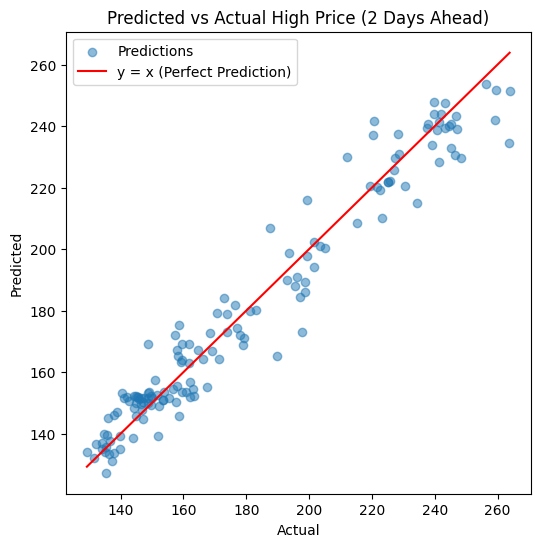

In [378]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linestyle="-", label="y = x (Perfect Prediction)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual High Price (2 Days Ahead)")
plt.legend()
plt.show()

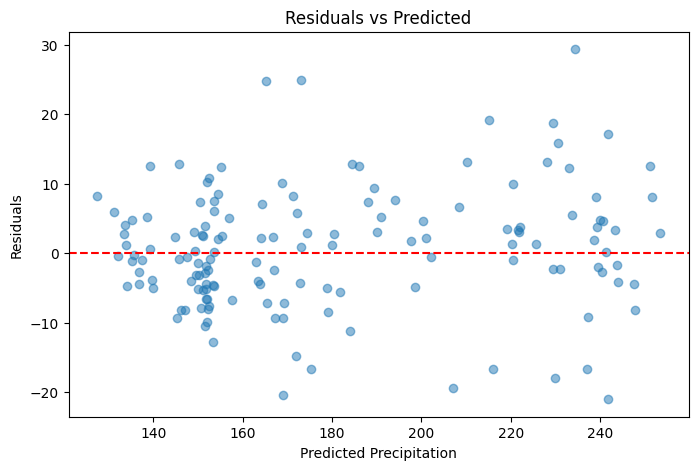

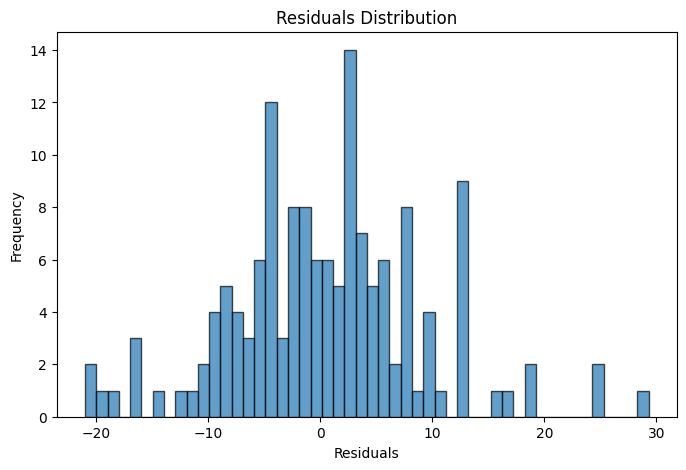

In [379]:
# converts single-column DataFrame to Series
y_test_series = y_test.squeeze() 

# Calculate residuals
residuals = y_test_series - y_pred

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Precipitation")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

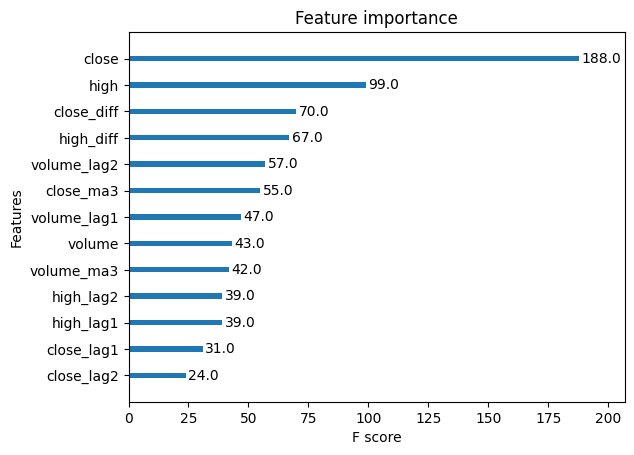

In [380]:
# Plot importances
ax = xgb.plot_importance(final_model)
ax.grid(False)
plt.show()


In [341]:
# Get feature importances as a dictionary
importances = final_model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for readability
import pandas as pd
importances_df = pd.DataFrame.from_dict(importances, orient='index', columns=['importance']).sort_values(by='importance', ascending=False)

# Display the top features
print(importances_df.head(20))

             importance
close             186.0
high               82.0
close_diff         75.0
close_ma3          59.0
high_diff          55.0
volume_ma3         52.0
volume_lag2        51.0
volume             47.0
volume_lag1        39.0
close_lag2         36.0
high_lag2          32.0
year               32.0
high_lag1          29.0
close_lag1         25.0


In [342]:
import shap

# Initialize TreeExplainer for XGBoost
explainer = shap.Explainer(final_model, X_data)

# Compute SHAP values on your test set
shap_values = explainer(X_test)

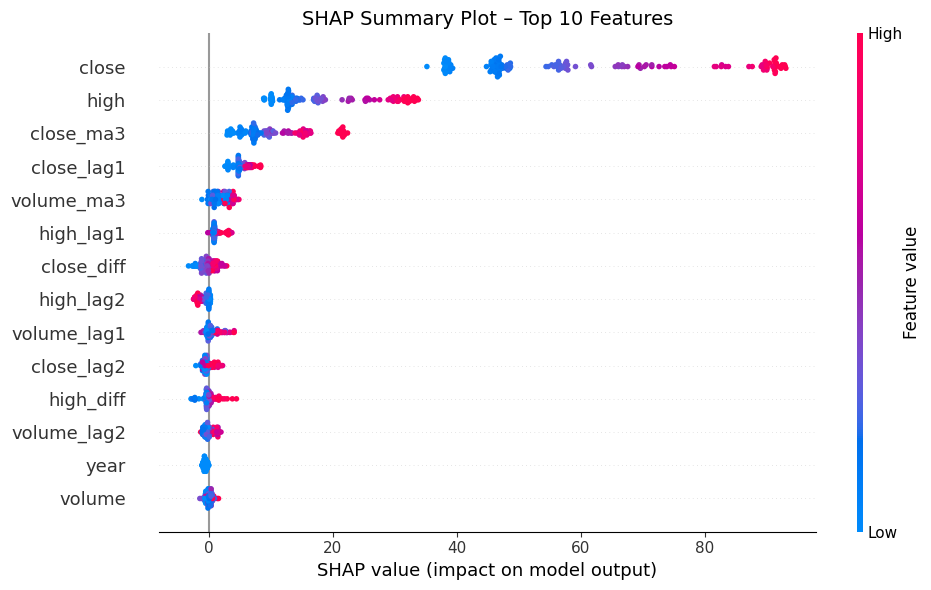

In [343]:
shap.summary_plot(
    shap_values, 
    X_test, 
    max_display=19,        # Top 10 most important features
    plot_size=(10, 6),     # Make it larger for readability
    show=False
)
plt.title("SHAP Summary Plot – Top 10 Features", fontsize=14)
plt.tight_layout()
plt.show()

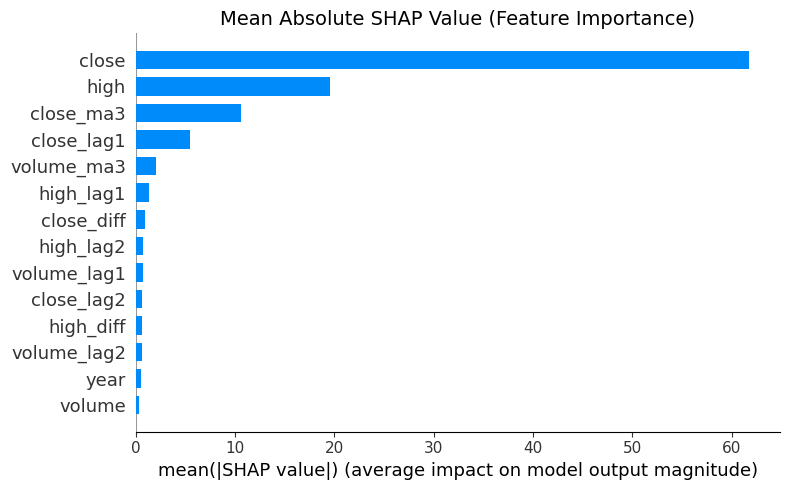

In [344]:
shap.summary_plot(
    shap_values, 
    X_test, 
    plot_type="bar", 
    max_display=19, 
    plot_size=(8, 5),
    show=False
)
plt.title("Mean Absolute SHAP Value (Feature Importance)", fontsize=14)
plt.tight_layout()
plt.show()

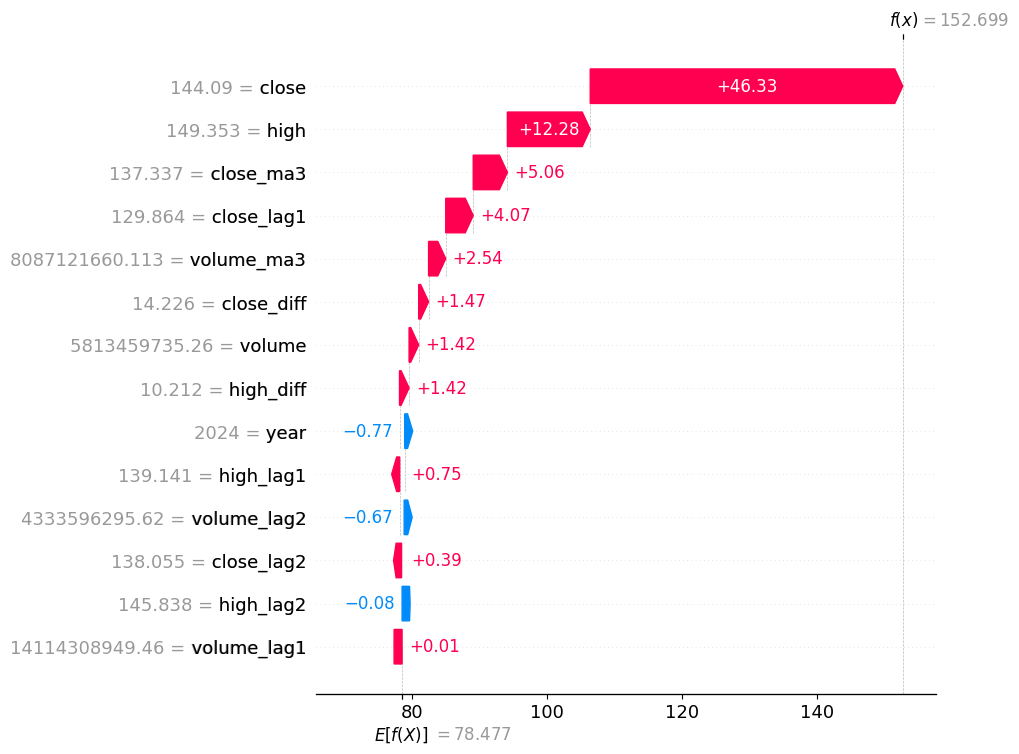

In [345]:
# Pick a test sample (e.g., index 0)
i = 0
shap.plots.waterfall(shap_values[i], max_display=20)

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
model_performance_explanations = """
Provide some explanations on model performance
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier. Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [ ]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [ ]:
# <Student to fill this section>
experiment_results_explanations = """
Reflect on the outcome of the experiment and list the new insights you gained from it. Provide rationale for pursuing more experimentation with the current approach or call out if you think it is a dead end.
Given the results achieved and the overall objective of the project, list the potential next steps and experiments. For each of them assess the expected uplift or gains and rank them accordingly. If the experiment achieved the required outcome for the business, recommend the steps to deploy this solution into production.
"""

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)